In [ ]:
import pandas as pd 
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from itertools import accumulate
import seaborn as sns
import re
import time
import math

In [ ]:
shiti = pd.read_csv('/content/全部实体（对齐到第一列）.csv',encoding = 'utf-8',error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 22: expected 4 fields, saw 5\nSkipping line 72: expected 4 fields, saw 5\nSkipping line 100: expected 4 fields, saw 5\n'


In [ ]:
pip install snownlp

In [ ]:
from snownlp import SnowNLP #导入
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [ ]:
ddf = pd.read_excel('/content/茂名（含自媒体）全部数据.xlsx',sheet_name=['酒店评论','景区评论','游记攻略','餐饮评论','微信公众号新闻'])
df1 = ddf.get('酒店评论')
df2 = ddf.get('景区评论')
df3 = ddf.get('游记攻略')
df4 = ddf.get('餐饮评论')
#df5 = ddf.get('微信公众号新闻')
textList = df1['评论内容'].to_list()+df2['评论内容'].to_list()+df3['正文'].to_list()+df4['评论内容'].to_list()

In [ ]:
df = pd.read_csv('茂名评论数据.csv',encoding='utf-8')
df["sentiment"] = df['评论内容'].apply(lambda x: get_sentiment_cn(str(x)))
df.head()

,ID,城市,名称,评论日期,评论内容,入住日期,入住房型,sentiment
0,酒店-1001,茂名,茂名君悦商务酒店,2018-12-02,干净卫生服务好,2018-12-02,标双,0.549826
1,酒店-1002,茂名,维也纳国际酒店(茂名电白店),2018-12-03,环境可以，干净！,2018-12-03,豪华双床房,0.765651
2,酒店-1003,茂名,茂名永利之家,2018-12-04,环境不错，房间卫生都很好，生活也很方便，就是隔音效果不理想，有时太吵。我定的优惠价，性价比很...,2018-12-04,标准单人间,0.998760
3,酒店-1004,茂名,茂名诚荟酒店,2018-12-05,很好.......舒服态度不错,2018-12-05,豪华大床房,0.911136
4,酒店-1005,茂名,茂名华景商务酒店,2018-12-06,#卫生# #设计风格# #酒店餐饮#,2018-12-06,特惠单人间(无窗),0.001171


In [ ]:
print(len(df[df['sentiment']< 0.5]))

1921


In [ ]:
import time
#将时间字符串转换为10位时间戳，时间字符串默认为2017-10-01 13:37:04格式
def date_to_timestamp(date, format_string="%Y-%m-%d"):
  time_array = time.strptime(date, format_string)
  time_stamp = int(time.mktime(time_array))
  return time_stamp

In [ ]:
temp1 = df[df['名称'].str.contains('化州铭丰假日酒店')]
print(temp1)

          ID  城市        名称        评论日期           评论内容        入住日期 入住房型  \
91   酒店-1092  茂名  化州铭丰假日酒店  2019-03-04  位置比较好的，就是床硬了点  2019-03-04  特惠房   
523  酒店-1524  茂名  化州铭丰假日酒店  2020-05-11          五星好评！  2020-05-11  特惠房   

     sentiment  
91    0.530423  
523   0.398216  


In [ ]:
products = []
id = 0
for index, row in shiti.iterrows():
  keywords = row.dropna().to_list()
  print(keywords)
  id = id +1
  product = []
  year = 2021
  N = 0
  T = 0
  X = 0
  Y = 0
  Z = 0
  dff = df[df['评论日期']>= '2021-01-01']
  dff = dff[dff['评论日期']< '2022-01-01']
  dff['评论日期']=dff['评论日期'].apply(lambda x: date_to_timestamp(x))
  #temp = pd.DataFrame()
  # for keyword in keywords:
  #   temp1 = dff[dff['名称'].str.contains(keyword)]
  #   temp=pd.concat([temp,temp1])
  dff = dff[dff['名称'].str.contains(keywords[0])]
  #dff = temp
  dff.drop_duplicates(subset=['ID'],keep='first',inplace=True)
  dff = dff.sort_values(by=['评论日期'],ascending=False)
  print(dff)
  N = len(dff)
  if len(dff)>1:
    T = (dff['评论日期'].to_list()[0]-dff['评论日期'].to_list()[1]) +1
  elif len(dff)==1:
    T= 100
  else:
    T = 100
  X = (len(dff[dff['sentiment']>= 0.5])-len(dff[dff['sentiment']< 0.5]))
  if X>0:
    Y= 1
  elif X<0:
    Y=-1
  else:
    Y=0
  if abs(X)>=1:
    Z=abs(X)
  else:
    Z=1
  try:
    F = math.log10(Z)+Y*N/T
  except ZeroDivisionError as err:
    F = 0
  print(N)
  print(T)
  print(X)
  print(Y)
  print(Z)
  print(F)
  product.append('ID'+str(id))
  product.append(keywords[0])
  product.append(F)
  product.append(year)
  products.append(product)
  print(products)

['茂名御景国际大酒店', '御景国际大酒店', '御景大酒店', '御景酒店']
           ID  城市         名称        评论日期  \
1091  酒店-2092  茂名  茂名御景国际大酒店  1638230400   
1087  酒店-2088  茂名  茂名御景国际大酒店  1637884800   
1031  酒店-2032  茂名  茂名御景国际大酒店  1633046400   
1021  酒店-2022  茂名  茂名御景国际大酒店  1632182400   
1011  酒店-2012  茂名  茂名御景国际大酒店  1631318400   
998   酒店-1999  茂名  茂名御景国际大酒店  1630195200   
979   酒店-1980  茂名  茂名御景国际大酒店  1628553600   
978   酒店-1979  茂名  茂名御景国际大酒店  1628467200   
936   酒店-1937  茂名  茂名御景国际大酒店  1624838400   
904   酒店-1905  茂名  茂名御景国际大酒店  1622073600   
888   酒店-1889  茂名  茂名御景国际大酒店  1620691200   
886   酒店-1887  茂名  茂名御景国际大酒店  1620518400   
883   酒店-1884  茂名  茂名御景国际大酒店  1620259200   
866   酒店-1867  茂名  茂名御景国际大酒店  1618790400   
859   酒店-1860  茂名  茂名御景国际大酒店  1618185600   
855   酒店-1856  茂名  茂名御景国际大酒店  1617840000   
853   酒店-1854  茂名  茂名御景国际大酒店  1617667200   
852   酒店-1853  茂名  茂名御景国际大酒店  1617580800   
759   酒店-1760  茂名  茂名御景国际大酒店  1609545600   
758   酒店-1759  茂名  茂名御景国际大酒店  1609459200   

                                 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021]]
['麗枫酒店(茂名高铁站店)', '麗枫酒店']
Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021]]
['茂名栈泉酒店', '栈泉酒店']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


          ID  城市      名称        评论日期        评论内容        入住日期   入住房型  sentiment
794  酒店-1795  茂名  茂名栈泉酒店  1612569600  早餐丰富，有停车场。  2021-02-06  标准大床房   0.387047
1
100
-1
-1
1
-0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021]]
['茂名途遇精品酒店', '途遇精品酒店', '途遇酒店']
Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021]]
['茂名红金鼎商务宾馆', '红金鼎宾馆']
Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021]]
['兰欧酒店(信宜绍秀体育馆店)']
Empty Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市         名称        评论日期  \
1090  酒店-2091  茂名  茂名观海楼假日酒店  1638144000   
1053  酒店-2054  茂名  茂名观海楼假日酒店  1634947200   
1036  酒店-2037  茂名  茂名观海楼假日酒店  1633478400   
1033  酒店-2034  茂名  茂名观海楼假日酒店  1633219200   
1032  酒店-2033  茂名  茂名观海楼假日酒店  1633132800   
1013  酒店-2014  茂名  茂名观海楼假日酒店  1631491200   
1004  酒店-2005  茂名  茂名观海楼假日酒店  1630713600   
1000  酒店-2001  茂名  茂名观海楼假日酒店  1630368000   
999   酒店-2000  茂名  茂名观海楼假日酒店  1630281600   
997   酒店-1998  茂名  茂名观海楼假日酒店  1630108800   
996   酒店-1997  茂名  茂名观海楼假日酒店  1630022400   
995   酒店-1996  茂名  茂名观海楼假日酒店  1629936000   
994   酒店-1995  茂名  茂名观海楼假日酒店  1629849600   
993   酒店-1994  茂名  茂名观海楼假日酒店  1629763200   
992   酒店-1993  茂名  茂名观海楼假日酒店  1629676800   
990   酒店-1991  茂名  茂名观海楼假日酒店  1629504000   
973   酒店-1974  茂名  茂名观海楼假日酒店  1628035200   
972   酒店-1973  茂名  茂名观海楼假日酒店  1627948800   
970   酒店-1971  茂名  茂名观海楼假日酒店  1627776000   
968   酒店-1969  茂名  茂名观海楼假日酒店  1627603200   
967   酒店-1968  茂名  茂名观海楼假日酒店  1627516800   
961   酒店-1962  茂名  茂名观海楼假日酒店  16

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.



0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021]]
['高州明悦宾馆', '明悦宾馆']
Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021]]
['茂名温德姆至尊酒店', '温德姆至尊酒店', '温德姆酒店']
Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021]]
['华海酒店(茂名高铁站店)', '华海酒店']
Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021]]
['柏曼酒店(茂名大道东汇城店)', '柏曼酒店']
Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


          ID  城市            名称        评论日期                               评论内容  \
795  酒店-1796  茂名  化州桐趣电影游戏主题酒店  1612656000  酒店装修很不错，设备设施新，一楼有很宽敞的休闲区，住得舒适，推荐。   

           入住日期     入住房型  sentiment  
795  2021-02-07  影视豪华大床房   0.994441  
1
100
1
1
1
0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


          ID  城市       名称        评论日期  \
912  酒店-1913  茂名  茂名荔晶大酒店  1622764800   
816  酒店-1817  茂名  茂名荔晶大酒店  1614470400   
778  酒店-1779  茂名  茂名荔晶大酒店  1611187200   
764  酒店-1765  茂名  茂名荔晶大酒店  1609977600   

                                                  评论内容        入住日期   入住房型  \
912  酒店地段不错，交通便利，房间大，酒店年份有点老，设施一般，空调不制暖，冷天入住太冷。早餐也还...  2021-06-04  豪华大床房   
816                                        环境好，卫生服务态度好  2021-02-28  豪华双床房   
778               酒店设施干净，房间宽敞明亮。前台接待热情。早餐丰富，停车方便，性价比高。  2021-01-21  豪华大床房   
764                                        地理位置不错，停车方便  2021-01-07  豪华双床房   

     sentiment  
912   0.524416  
816   0.540438  
778   0.988249  
764   0.961893  
4
8294401
4
1
4
0.6020604735809907
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


          ID  城市             名称        评论日期           评论内容        入住日期   入住房型  \
976  酒店-1977  茂名  茂名万达广场雅斯特国际酒店  1628294400         非常好的选择  2021-08-07   亲子套房   
908  酒店-1909  茂名  茂名万达广场雅斯特国际酒店  1622419200       景色很好，很舒服  2021-05-31  豪华大床房   
902  酒店-1903  茂名  茂名万达广场雅斯特国际酒店  1621900800       很好住起来很舒服  2021-05-25  豪华大床房   
832  酒店-1833  茂名  茂名万达广场雅斯特国际酒店  1615852800  挺方便的，一出门就是大马路  2021-03-16  豪华大床房   
791  酒店-1792  茂名  茂名万达广场雅斯特国际酒店  1612310400      车位好多，服务不错  2021-02-03  豪华大床房   

     sentiment  
976   0.732515  
908   0.991044  
902   0.888121  
832   0.533594  
791   0.899041  
5
5875201
5
1
5
0.6989708553707324
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市      名称        评论日期                   评论内容        入住日期  \
1040  酒店-2041  茂名  茂名诚荟酒店  1633824000                 卫生好，安静  2021-10-10   
875   酒店-1876  茂名  茂名诚荟酒店  1619568000             安静，舒适，服务到位  2021-04-28   
862   酒店-1863  茂名  茂名诚荟酒店  1618444800                都很好下次再来  2021-04-15   
843   酒店-1844  茂名  茂名诚荟酒店  1616803200  什么都好就是隔音差点，隔壁是KTV不好睡觉  2021-03-27   
825   酒店-1826  茂名  茂名诚荟酒店  1615248000           离万达很近，吃饭逛街方便  2021-03-09   

       入住房型  sentiment  
1040  豪华大床房   0.610147  
875   豪华大床房   0.957691  
862   豪华双人房   0.746182  
843   豪华大床房   0.002905  
825   豪华大床房   0.876656  
5
14256001
3
1
3
0.4771216054491552
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


          ID  城市      名称        评论日期   评论内容        入住日期   入住房型  sentiment
923  酒店-1924  茂名  茂名华燕宾馆  1623715200  性价比不错  2021-06-15  标准双人房   0.974015
1
100
1
1
1
0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


          ID  城市        名称        评论日期  \
930  酒店-1931  茂名  化州桔龙商务酒店  1624320000   

                                                  评论内容        入住日期   入住房型  \
930  这个酒店价格不贵，实惠，性价比高，就是呢没有早餐，其他各方面还可以吧，毕竟价钱摆在那里的呢，...  2021-06-22  标准大床房   

     sentiment  
930   0.964382  
1
100
1
1
1
0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市              名称        评论日期                 评论内容 入住日期 入住房型  \
2127  景区-2035  茂名  广垦（茂名）国家热带农业公园  1623369600     环境好，蔬果的品种多，交通便捷。  NaN  NaN   
2024  景区-1932  茂名  广垦（茂名）国家热带农业公园  1614297600  不错的地方，很好玩，门票也不贵，值得。  NaN  NaN   

      sentiment  
2127   0.998450  
2024   0.978386  
2
9072001
2
1
2
0.3010302161225107
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市   名称        评论日期                                     评论内容  \
2197  景区-2105  茂名  石根山  1629676800                  大自然的风景，有缆车，有人工爬梯，高山自然风夷   
2107  景区-2015  茂名  石根山  1621468800  总体感觉很好，大概两个半小时登上山顶。总体超赞，景色不错，有趣好玩，性价比高，   

     入住日期 入住房型  sentiment  
2197  NaN  NaN   0.759369  
2107  NaN  NaN   1.000000  
2
8208001
2
1
2
0.30103023932866885
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市      名称        评论日期  \
2128  景区-2036  茂名  湛江海湾大桥  1623456000   

                                                   评论内容 入住日期 入住房型  sentiment  
2128  在湛江逗留近一周，两次见到海湾大桥，第一次是坐红嘴鸥号从桥下经过，体会到其雄伟的一面，以及了...  NaN  NaN   0.780059  
1
100
1
1
1
0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市     名称        评论日期  \
2210  景区-2118  茂名  闸坡大角湾  1630800000   
2166  景区-2074  茂名  闸坡大角湾  1626912000   
2159  景区-2067  茂名  闸坡大角湾  1626307200   
2155  景区-2063  茂名  闸坡大角湾  1625961600   
2149  景区-2057  茂名  闸坡大角湾  1625443200   
2066  景区-1974  茂名  闸坡大角湾  1617926400   

                                                   评论内容 入住日期 入住房型  sentiment  
2210                                      每年都要来一次，喜欢大角湾  NaN  NaN   0.651501  
2166               沙不是很清，但水上项目较多，关键这个票含了水上乐园门票，孩子玩得挺开心。  NaN  NaN   0.770488  
2159                                         不错，下次继续去玩。  NaN  NaN   0.927414  
2155  大海很蓝天空也美，里头的沙滩也细腻，就是门票有点小贵，性价比不是高，喜欢玩水大海的带上一家子...  NaN  NaN   0.999983  
2149  闸坡大角湾景区，地处南亚热带，全年日照时间长，年平均气温22.8，水温23.5，降雨量181...  NaN  NaN   0.385570  
2066  国家海洋公园，中国最美十大海岛之一，海滨浴场的水质很好，海水清澈见底，淡季票价不高，携程订票...  NaN  NaN   0.998788  
6
3888001
4
1
4
0.602061534537442
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店'

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市       名称        评论日期  \
2229  景区-2137  茂名  金沙湾海滨浴场  1632614400   
2213  景区-2121  茂名  金沙湾海滨浴场  1631059200   
2205  景区-2113  茂名  金沙湾海滨浴场  1630368000   

                                                   评论内容 入住日期 入住房型  sentiment  
2229                                    风景如画，沙白细软，市区浴场。  NaN  NaN   0.786961  
2213                     太好了。可能白天热，人也少，沙滩很漂亮。湛江没有三亚的喧嚣。  NaN  NaN   0.690911  
2205  在湛江的金沙湾海滩边上看风景，吃吃东西真的很舒服 有些饭店临海的，那环境绝对好，人均也不贵，...  NaN  NaN   0.999928  
3
1555201
3
1
3
0.47712318373076773
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市     名称        评论日期  \
2275  景区-2183  茂名  玉湖风景区  1636675200   
2224  景区-2132  茂名  玉湖风景区  1632182400   
2223  景区-2131  茂名  玉湖风景区  1632096000   

                                                   评论内容 入住日期 入住房型  sentiment  
2275  举报 私自拉闸收门票 坐标广东省茂名市高州市玉湖风景区瞭望亭 看到这景象而无人管真让人扫兴 ...  NaN  NaN   0.000032  
2224                                大型丘陵地带建造的中型水库，适合周末游  NaN  NaN   0.990589  
2223                               就是解放后修建的高州水库，整治后好看很多  NaN  NaN   0.854710  
3
4492801
1
1
1
6.677348941117134e-07
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['I

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市            名称        评论日期  \
2208  景区-2116  茂名           海陵岛  1630627200   
2173  景区-2081  茂名  海陵岛红树林国家湿地公园  1627516800   
2126  景区-2034  茂名  海陵岛红树林国家湿地公园  1623283200   
2120  景区-2028  茂名           海陵岛  1622678400   
2101  景区-2009  茂名  海陵岛红树林国家湿地公园  1620950400   

                                                   评论内容 入住日期 入住房型  sentiment  
2208  海陵岛绝对是广东最漂亮的沙滩，没有之一，沙质细腻、没有石头，海岸线长，泳区安全，还有美味的海...  NaN  NaN   0.999536  
2173                                          蓝天白云风景如画。  NaN  NaN   0.557686  
2126                                   这个景点还是不错的还是值得一去的  NaN  NaN   0.986574  
2120         海陵岛，有阳光大沙滩，马尾岛，海水清澈，还有一夜埕海味干货街，非常推荐大家去玩一下。  NaN  NaN   0.984167  
2101                                              景色不错，  NaN  NaN   0.980798  
5
3110401
5
1
5
0.6989716118457902
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 20

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市       名称        评论日期  \
2257  景区-2165  茂名  乐天温泉度假村  1635120000   
2146  景区-2054  茂名  乐天温泉度假村  1625184000   
2115  景区-2023  茂名  乐天温泉度假村  1622160000   

                                                   评论内容 入住日期 入住房型  \
2257         有没有泡温泉单门票的，这样叫捆绑消费，有点没合适吧。 【景色】 【趣味】 【性价比】  NaN  NaN   
2146  这一次体验没有一个月前这么好了，休息区比较吵，空调相当于没有，还是我自己偷偷开的，住了四天，...  NaN  NaN   
2115  这里的服务员态度很好，特别是休息区的阿姨和服务员，非常热情，按时提醒客人吃饭，前台的接待也不...  NaN  NaN   

         sentiment  
2257  8.736876e-01  
2146  5.735257e-10  
2115  8.945890e-01  
3
9936001
1
1
1
3.019323367620434e-07
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], [

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市         名称        评论日期                   评论内容 入住日期 入住房型  \
2058  景区-1966  茂名  天龙顶国家山地公园  1617235200  公园不大当时景色真的不错。可以来这里逛逛。  NaN  NaN   

      sentiment  
2058   0.998947  
1
100
1
1
1
0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市   名称        评论日期  \
2286  景区-2194  茂名  特呈岛  1637712000   
2281  景区-2189  茂名  特呈岛  1637193600   
2263  景区-2171  茂名  特呈岛  1635638400   
2261  景区-2169  茂名  特呈岛  1635465600   
2220  景区-2128  茂名  特呈岛  1631836800   
2162  景区-2070  茂名  特呈岛  1626566400   
2158  景区-2066  茂名  特呈岛  1626220800   
2154  景区-2062  茂名  特呈岛  1625875200   
2137  景区-2045  茂名  特呈岛  1624320000   
2106  景区-2014  茂名  特呈岛  1621382400   
2102  景区-2010  茂名  特呈岛  1621036800   
2093  景区-2001  茂名  特呈岛  1620259200   
2078  景区-1986  茂名  特呈岛  1618963200   
2054  景区-1962  茂名  特呈岛  1616889600   

                                                   评论内容 入住日期 入住房型  sentiment  
2286                                这里环境优美，服务设施齐全，值得前往。  NaN  NaN   0.977065  
2281  特呈岛码头就在湛江市中心，交通很方便，坐上游船在海浪中便到了，岛上的红树林是一大打卡点，适合...  NaN  NaN   0.008186  
2263                                     挺值得去的，不过夏天真的好热  NaN  NaN   0.915108  
2261  #本地人带你游 推荐理由： 印象中的家乡就是海风，沙滩，螃蟹和安静的夜晚。一直在最南边的半岛...  NaN  NaN   1.000000  
2220  特呈岛距离湛江霞山市区2.8海里，与霞山区隔海相望。美丽

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市       名称        评论日期  \
2293  景区-2201  茂名  鼎龙湾欢乐海岸  1638316800   
2277  景区-2185  茂名  鼎龙湾欢乐海岸  1636848000   
2272  景区-2180  茂名  鼎龙湾欢乐海岸  1636416000   
2259  景区-2167  茂名  鼎龙湾欢乐海岸  1635292800   
2240  景区-2148  茂名  鼎龙湾欢乐海岸  1633564800   
2171  景区-2079  茂名  鼎龙湾欢乐海岸  1627344000   
2002  景区-1910  茂名  鼎龙湾欢乐海岸  1612396800   

                                                   评论内容 入住日期 入住房型  sentiment  
2293  吴川市鼎龙湾附近一个免费的摄影基地，好看的场景 真的非常非常多，我因为没带几套衣服，时间也有...  NaN  NaN   0.994584  
2277  #湛江怎么玩 湛江，广东省地级市，旧称“广州湾”，别称“港城”，位于中国大陆南端、广东省西南...  NaN  NaN   0.735031  
2272                    挺不错的，淡季人比较少，很安静的海边风景区，值得去好好玩一玩。  NaN  NaN   0.999899  
2259  #湛江怎么玩 广东周边游湛江鼎龙湾周末好去处海边骑马|||发现了一个小众海滩，人少海滩干净，...  NaN  NaN   1.000000  
2240  #湛江怎么玩 去不了普吉岛，也不去了马尔代夫，就来湛江吧，来了告诉我，我请你喝奶茶哦。#中秋...  NaN  NaN   0.000569  
2171  夏天与海滩真是绝配。晚上的鼎龙湾让人感觉分外舒服。饭后在海边吹吹海风散散步是件多么惬意的事情...  NaN  NaN   1.000000  
2002                               浪漫的地方，美得幽静怡人，让人流连忘返。  NaN  NaN   0.999943  
7
1468801
5
1
5
0.6989747701279

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市   名称        评论日期                                       评论内容  \
2289  景区-2197  茂名  田园寨  1637971200  景色一般，都没廉江樱花公园美丽好玩，田园寨基本处处都要收费，在那消费还要收停车费‘   

     入住日期 入住房型  sentiment  
2289  NaN  NaN   0.965207  
1
100
1
1
1
0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市     名称        评论日期  \
2210  景区-2118  茂名  闸坡大角湾  1630800000   
2166  景区-2074  茂名  闸坡大角湾  1626912000   
2159  景区-2067  茂名  闸坡大角湾  1626307200   
2155  景区-2063  茂名  闸坡大角湾  1625961600   
2149  景区-2057  茂名  闸坡大角湾  1625443200   
2066  景区-1974  茂名  闸坡大角湾  1617926400   

                                                   评论内容 入住日期 入住房型  sentiment  
2210                                      每年都要来一次，喜欢大角湾  NaN  NaN   0.651501  
2166               沙不是很清，但水上项目较多，关键这个票含了水上乐园门票，孩子玩得挺开心。  NaN  NaN   0.770488  
2159                                         不错，下次继续去玩。  NaN  NaN   0.927414  
2155  大海很蓝天空也美，里头的沙滩也细腻，就是门票有点小贵，性价比不是高，喜欢玩水大海的带上一家子...  NaN  NaN   0.999983  
2149  闸坡大角湾景区，地处南亚热带，全年日照时间长，年平均气温22.8，水温23.5，降雨量181...  NaN  NaN   0.385570  
2066  国家海洋公园，中国最美十大海岛之一，海滨浴场的水质很好，海水清澈见底，淡季票价不高，携程订票...  NaN  NaN   0.998788  
6
3888001
4
1
4
0.602061534537442
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店'

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市           名称        评论日期  \
2256  景区-2164  茂名  广东海上丝绸之路博物馆  1635033600   
2214  景区-2122  茂名  广东海上丝绸之路博物馆  1631232000   
2160  景区-2068  茂名  广东海上丝绸之路博物馆  1626393600   
2087  景区-1995  茂名  广东海上丝绸之路博物馆  1619740800   
1983  景区-1891  茂名  广东海上丝绸之路博物馆  1610755200   

                                                   评论内容 入住日期 入住房型  sentiment  
2256  在临离开阳江之际，参观了期待已久的广东海上丝绸之路博物馆，这里是“南海1号”沉船考古的地方。...  NaN  NaN   1.000000  
2214  酒店位置很好很方便，酒店房间合適，酒店服务员热情有礼，酒店设置齐全。 酒店价位合适。酒店位置...  NaN  NaN   1.000000  
2160  携程周三满减买，又银行卡减免了点，每张大概59，性价比还是可以的。馆内虽然展品不算种类繁多，...  NaN  NaN   0.999956  
2087  今天跟團去十里銀灘玩，在剪票出入口就是海上絲綢之路博物館。博物館外觀建築很特別，旁邊有個大船...  NaN  NaN   0.414501  
1983  做为全国唯一的水下考古博物馆还是有必要看看的，每天有2场免费讲解，对于知识面的扩宽还是很有帮...  NaN  NaN   0.999943  
5
3801601
3
1
3
0.4771225699550067
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], [

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市           名称        评论日期  \
2274  景区-2182  茂名  冼太夫人故里文化旅游区  1636588800   
2199  景区-2107  茂名  冼太夫人故里文化旅游区  1629849600   
2175  景区-2083  茂名  冼太夫人故里文化旅游区  1627689600   
2037  景区-1945  茂名  冼太夫人故里文化旅游区  1615420800   

                                                   评论内容 入住日期 入住房型  sentiment  
2274  意义极大，中国历史女英雄之第一人， 值得敬拜。 景区建设初具规模。 建设完成后，应该配得上对...  NaN  NaN   0.999998  
2199                              宣传方式不对。有点名过其实。氏族文化代表。  NaN  NaN   0.808738  
2175                                 唯用一好心，红色基地个人觉得应该免费  NaN  NaN   0.698485  
2037               冼太故里一日游，感触颇深 在我们中国有这位女性战国英雄，是我们学习的傍样  NaN  NaN   0.999864  
4
6739201
4
1
4
0.6020605848701346
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市    名称        评论日期                                  评论内容  \
2182  景区-2090  茂名  镇隆古城  1628294400  就这？村中城吧？感觉不好，乱乱的、破破的，令人遗憾。好在是不收门票费的。   

     入住日期 入住房型  sentiment  
2182  NaN  NaN   0.136426  
1
100
-1
-1
1
-0.01
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市           名称        评论日期  \
8918  餐饮-7623  茂名  盛香烧鹅（东方市场店）  1636156800   
8851  餐饮-7556  茂名  盛香烧鹅（东方市场店）  1635552000   
8786  餐饮-7491  茂名  盛香烧鹅（东方市场店）  1635033600   
8676  餐饮-7381  茂名  盛香烧鹅（东方市场店）  1634428800   
8636  餐饮-7341  茂名  盛香烧鹅（东方市场店）  1634169600   
8413  餐饮-7118  茂名  盛香烧鹅（东方市场店）  1633046400   
8140  餐饮-6845  茂名  盛香烧鹅（东方市场店）  1631318400   
7900  餐饮-6605  茂名  盛香烧鹅（东方市场店）  1630108800   
7730  餐饮-6435  茂名  盛香烧鹅（东方市场店）  1629331200   
7443  餐饮-6148  茂名  盛香烧鹅（东方市场店）  1627948800   
7203  餐饮-5908  茂名  盛香烧鹅（东方市场店）  1626739200   
7171  餐饮-5876  茂名  盛香烧鹅（东方市场店）  1626566400   
7134  餐饮-5839  茂名  盛香烧鹅（东方市场店）  1626393600   
6957  餐饮-5662  茂名  盛香烧鹅（东方市场店）  1625529600   
6955  餐饮-5660  茂名  盛香烧鹅（东方市场店）  1625529600   
6921  餐饮-5626  茂名  盛香烧鹅（东方市场店）  1625356800   
6777  餐饮-5482  茂名  盛香烧鹅（东方市场店）  1624752000   
6711  餐饮-5416  茂名  盛香烧鹅（东方市场店）  1624406400   
6436  餐饮-5141  茂名  盛香烧鹅（东方市场店）  1622764800   
6417  餐饮-5122  茂名  盛香烧鹅（东方市场店）  1622678400   
6352  餐饮-5057  茂名  盛香烧鹅（东方市场店）  16

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25', '凯里亚德酒店(茂名电白万达广场店)', 0.0, 2021], ['ID26', '好莱登商务宾馆(信宜绍秀体育馆店)', 0.0, 2021], ['ID27', '茂名大龙湾酒店', 0.

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市          名称        评论日期  \
8840  餐饮-7545  茂名  小乔紫菜卷（小乔店）  1635379200   
8769  餐饮-7474  茂名  小乔紫菜卷（小乔店）  1634947200   
8728  餐饮-7433  茂名  小乔紫菜卷（小乔店）  1634688000   
8685  餐饮-7390  茂名  小乔紫菜卷（小乔店）  1634428800   
8652  餐饮-7357  茂名  小乔紫菜卷（小乔店）  1634256000   
8470  餐饮-7175  茂名  小乔紫菜卷（小乔店）  1633305600   
8443  餐饮-7148  茂名  小乔紫菜卷（小乔店）  1633132800   
7850  餐饮-6555  茂名  小乔紫菜卷（小乔店）  1629849600   
7849  餐饮-6554  茂名  小乔紫菜卷（小乔店）  1629849600   
7766  餐饮-6471  茂名  小乔紫菜卷（小乔店）  1629504000   
7679  餐饮-6384  茂名  小乔紫菜卷（小乔店）  1629072000   
7638  餐饮-6343  茂名  小乔紫菜卷（小乔店）  1628899200   
7520  餐饮-6225  茂名  小乔紫菜卷（小乔店）  1628294400   
7522  餐饮-6227  茂名  小乔紫菜卷（小乔店）  1628294400   
7317  餐饮-6022  茂名  小乔紫菜卷（小乔店）  1627257600   
7297  餐饮-6002  茂名  小乔紫菜卷（小乔店）  1627171200   
7176  餐饮-5881  茂名  小乔紫菜卷（小乔店）  1626566400   
7114  餐饮-5819  茂名  小乔紫菜卷（小乔店）  1626307200   
7082  餐饮-5787  茂名  小乔紫菜卷（小乔店）  1626134400   
7007  餐饮-5712  茂名  小乔紫菜卷（小乔店）  1625788800   
6744  餐饮-5449  茂名  小乔紫菜卷（小乔店）  1624579200   
6671  餐饮-5

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Empty DataFrame
Columns: [ID, 城市, 名称, 评论日期, 评论内容, 入住日期, 入住房型, sentiment]
Index: []
0
100
0
0
1
0.0
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25',

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市         名称        评论日期  \
8961  餐饮-7666  茂名  相聚时光（光明店）  1636502400   
8922  餐饮-7627  茂名  相聚时光（光明店）  1636156800   
8899  餐饮-7604  茂名  相聚时光（光明店）  1635984000   
8890  餐饮-7595  茂名  相聚时光（光明店）  1635897600   
8870  餐饮-7575  茂名  相聚时光（光明店）  1635724800   
8774  餐饮-7479  茂名  相聚时光（光明店）  1634947200   
8629  餐饮-7334  茂名  相聚时光（光明店）  1634083200   
8374  餐饮-7079  茂名  相聚时光（光明店）  1632700800   
8349  餐饮-7054  茂名  相聚时光（光明店）  1632614400   
8336  餐饮-7041  茂名  相聚时光（光明店）  1632528000   
8335  餐饮-7040  茂名  相聚时光（光明店）  1632528000   
8079  餐饮-6784  茂名  相聚时光（光明店）  1630886400   
7778  餐饮-6483  茂名  相聚时光（光明店）  1629504000   
7593  餐饮-6298  茂名  相聚时光（光明店）  1628640000   
7539  餐饮-6244  茂名  相聚时光（光明店）  1628380800   
7510  餐饮-6215  茂名  相聚时光（光明店）  1628208000   
7279  餐饮-5984  茂名  相聚时光（光明店）  1627084800   
7246  餐饮-5951  茂名  相聚时光（光明店）  1626912000   
7194  餐饮-5899  茂名  相聚时光（光明店）  1626652800   
7119  餐饮-5824  茂名  相聚时光（光明店）  1626307200   
6880  餐饮-5585  茂名  相聚时光（光明店）  1625184000   
6861  餐饮-5566  茂名  相聚时光（光明店）  16

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市            名称        评论日期  \
8312  餐饮-7017  茂名  元晟坊蛋糕（南香公园店）  1632441600   
7455  餐饮-6160  茂名  元晟坊蛋糕（南香公园店）  1627948800   
7454  餐饮-6159  茂名  元晟坊蛋糕（南香公园店）  1627948800   
7050  餐饮-5755  茂名  元晟坊蛋糕（南香公园店）  1625961600   
6993  餐饮-5698  茂名  元晟坊蛋糕（南香公园店）  1625702400   
6640  餐饮-5345  茂名  元晟坊蛋糕（南香公园店）  1623974400   
6431  餐饮-5136  茂名  元晟坊蛋糕（南香公园店）  1622764800   
6400  餐饮-5105  茂名  元晟坊蛋糕（南香公园店）  1622505600   
6074  餐饮-4779  茂名  元晟坊蛋糕（南香公园店）  1621036800   
5779  餐饮-4484  茂名  元晟坊蛋糕（南香公园店）  1619308800   
5727  餐饮-4432  茂名  元晟坊蛋糕（南香公园店）  1618963200   
5697  餐饮-4402  茂名  元晟坊蛋糕（南香公园店）  1618790400   
5699  餐饮-4404  茂名  元晟坊蛋糕（南香公园店）  1618790400   
5647  餐饮-4352  茂名  元晟坊蛋糕（南香公园店）  1618444800   
5549  餐饮-4254  茂名  元晟坊蛋糕（南香公园店）  1617753600   
5424  餐饮-4129  茂名  元晟坊蛋糕（南香公园店）  1616889600   
5398  餐饮-4103  茂名  元晟坊蛋糕（南香公园店）  1616630400   
5390  餐饮-4095  茂名  元晟坊蛋糕（南香公园店）  1616544000   
5389  餐饮-4094  茂名  元晟坊蛋糕（南香公园店）  1616544000   
5078  餐饮-3783  茂名  元晟坊蛋糕（南香公园店）  1612742400   
5012  餐饮-3717

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市              名称        评论日期                         评论内容  \
9081  餐饮-7786  茂名  顺德火焰醉鹅坊（站北五路店）  1637366400             一般，没有说很好吃，就是味道一般   
9028  餐饮-7733  茂名  顺德火焰醉鹅坊（站北五路店）  1637020800            味道很淡，青菜没洗干净，还有塑料带   
8932  餐饮-7637  茂名  顺德火焰醉鹅坊（站北五路店）  1636243200          不想说话，难吃，店里一股老鼠尿的味道。   
8931  餐饮-7636  茂名  顺德火焰醉鹅坊（站北五路店）  1636243200  #套餐：3-4 人火锅套餐，材料新鲜看见，味道也是一绝   
8827  餐饮-7532  茂名  顺德火焰醉鹅坊（站北五路店）  1635292800                   6人份，7个人也够吃   
...       ...  ..             ...         ...                          ...   
4959  餐饮-3664  茂名  顺德火焰醉鹅坊（站北五路店）  1611014400     味道一般般，最恶心的是开个发票都要加钱才能给你开   
4958  餐饮-3663  茂名  顺德火焰醉鹅坊（站北五路店）  1611014400            不错，味道很好，经济实惠，较大众。   
4944  餐饮-3649  茂名  顺德火焰醉鹅坊（站北五路店）  1610841600   此次用餐总体来说不错，觉得比较认可的地方有：性价比。   
4940  餐饮-3645  茂名  顺德火焰醉鹅坊（站北五路店）  1610755200                     多次帮衬，好好吃   
4913  餐饮-3618  茂名  顺德火焰醉鹅坊（站北五路店）  1610150400  还可以，不过4个大人和一个小孩，点了这个套餐，太多了。   

               入住日期 入住房型  sentiment  
9081       3-4人火锅套餐  NaN 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市              名称        评论日期  \
9058  餐饮-7763  茂名  爵士厚牛排自助餐馆（汇丰店）  1637280000   
9003  餐饮-7708  茂名  爵士厚牛排自助餐馆（汇丰店）  1636848000   
8914  餐饮-7619  茂名  爵士厚牛排自助餐馆（汇丰店）  1636156800   
8844  餐饮-7549  茂名  爵士厚牛排自助餐馆（汇丰店）  1635465600   
8824  餐饮-7529  茂名  爵士厚牛排自助餐馆（汇丰店）  1635292800   
...       ...  ..             ...         ...   
4956  餐饮-3661  茂名  爵士厚牛排自助餐馆（汇丰店）  1611014400   
4893  餐饮-3598  茂名  爵士厚牛排自助餐馆（汇丰店）  1609977600   
4887  餐饮-3592  茂名  爵士厚牛排自助餐馆（汇丰店）  1609891200   
4868  餐饮-3573  茂名  爵士厚牛排自助餐馆（汇丰店）  1609632000   
4866  餐饮-3571  茂名  爵士厚牛排自助餐馆（汇丰店）  1609632000   

                                                   评论内容         入住日期 入住房型  \
9058                            很经济实惠，牛排还可以，饮料那些需要改进一下吧  全部菜品2选1，有赠品  NaN   
9003                               七分熟的火焰牛排好吃，自助的东西较多品种   火焰牛排1份，有赠品  NaN   
8914                                 自助餐就那几个菜，不仅不好吃还浪费钱   火焰牛排1份，有赠品  NaN   
8844                                味道不错，服务还行。菜品比以前差了一点  全部菜品2选1，有赠品  NaN   
8824                      

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市              名称        评论日期  \
8707  餐饮-7412  茂名  大赞∙炙烧寿司（万达广场店）  1634601600   
8325  餐饮-7030  茂名  大赞∙炙烧寿司（万达广场店）  1632528000   
8080  餐饮-6785  茂名  大赞∙炙烧寿司（万达广场店）  1630972800   
7832  餐饮-6537  茂名  大赞∙炙烧寿司（万达广场店）  1629849600   
7831  餐饮-6536  茂名  大赞∙炙烧寿司（万达广场店）  1629849600   
7644  餐饮-6349  茂名  大赞∙炙烧寿司（万达广场店）  1628985600   
7471  餐饮-6176  茂名  大赞∙炙烧寿司（万达广场店）  1628121600   
7374  餐饮-6079  茂名  大赞∙炙烧寿司（万达广场店）  1627603200   
7373  餐饮-6078  茂名  大赞∙炙烧寿司（万达广场店）  1627603200   
7355  餐饮-6060  茂名  大赞∙炙烧寿司（万达广场店）  1627516800   
7322  餐饮-6027  茂名  大赞∙炙烧寿司（万达广场店）  1627344000   
7303  餐饮-6008  茂名  大赞∙炙烧寿司（万达广场店）  1627257600   
7165  餐饮-5870  茂名  大赞∙炙烧寿司（万达广场店）  1626566400   
6965  餐饮-5670  茂名  大赞∙炙烧寿司（万达广场店）  1625616000   
6734  餐饮-5439  茂名  大赞∙炙烧寿司（万达广场店）  1624579200   
6722  餐饮-5427  茂名  大赞∙炙烧寿司（万达广场店）  1624492800   
6604  餐饮-5309  茂名  大赞∙炙烧寿司（万达广场店）  1623801600   
6581  餐饮-5286  茂名  大赞∙炙烧寿司（万达广场店）  1623628800   
6513  餐饮-5218  茂名  大赞∙炙烧寿司（万达广场店）  1623283200   
6486  餐饮-5191  茂名  大

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市                  名称        评论日期  \
8284  餐饮-6989  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1632268800   
8050  餐饮-6755  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1630800000   
8037  餐饮-6742  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1630713600   
6950  餐饮-5655  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1625529600   
6795  餐饮-5500  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1624838400   
6759  餐饮-5464  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1624665600   
6211  餐饮-4916  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1621641600   
5903  餐饮-4608  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1620000000   
5822  餐饮-4527  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1619568000   
5733  餐饮-4438  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1618963200   
5732  餐饮-4437  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1618963200   
5479  餐饮-4184  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1617321600   
5285  餐饮-3990  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1615420800   
5214  餐饮-3919  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1614556800   
5062  餐饮-3767  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1612569600   
4920  餐饮-3625  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1610323200   
4908  餐饮-3613  茂名  螺香汇·柳州螺蛳粉（官渡二路油校店）  1610150400   

                                             

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市         名称        评论日期  \
7478  餐饮-6183  茂名  果之度（开发区店）  1628121600   
7090  餐饮-5795  茂名  果之度（开发区店）  1626220800   
6051  餐饮-4756  茂名  果之度（开发区店）  1620864000   
6002  餐饮-4707  茂名  果之度（开发区店）  1620518400   
5920  餐饮-4625  茂名  果之度（开发区店）  1620086400   
5608  餐饮-4313  茂名  果之度（开发区店）  1618099200   
5498  餐饮-4203  茂名  果之度（开发区店）  1617494400   
5407  餐饮-4112  茂名  果之度（开发区店）  1616716800   
5408  餐饮-4113  茂名  果之度（开发区店）  1616716800   
5003  餐饮-3708  茂名  果之度（开发区店）  1611792000   

                                                   评论内容            入住日期 入住房型  \
7478                                  榴莲千层蛋糕美味可口，下班还会来。  榴莲千层蛋糕1个，约1磅，圆  NaN   
7090                            一有空就喜欢qu那坐坐，很喜欢那里的环境，舒服        榴莲千层切件1份  NaN   
6051                                                 不错        榴莲千层切件1份  NaN   
6002                                        感觉没有以前吃过的好吃  榴莲千层蛋糕1个，约3磅，圆  NaN   
5920  一直都是喜欢榴莲千层蛋糕，所以呢，还可以味道，如果还多点榴莲，少一点奶油的话，会更好吃，怎么...  榴莲千层蛋糕1个，约3磅，圆  NaN   
5608                               

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市        名称        评论日期  \
9205  餐饮-7910  茂名  友情有意音乐餐厅  1638316800   
9204  餐饮-7909  茂名  友情有意音乐餐厅  1638316800   
9191  餐饮-7896  茂名  友情有意音乐餐厅  1638230400   
9118  餐饮-7823  茂名  友情有意音乐餐厅  1637625600   
9117  餐饮-7822  茂名  友情有意音乐餐厅  1637625600   
...       ...  ..       ...         ...   
5045  餐饮-3750  茂名  友情有意音乐餐厅  1612310400   
5017  餐饮-3722  茂名  友情有意音乐餐厅  1611964800   
4981  餐饮-3686  茂名  友情有意音乐餐厅  1611532800   
4938  餐饮-3643  茂名  友情有意音乐餐厅  1610755200   
4936  餐饮-3641  茂名  友情有意音乐餐厅  1610755200   

                                                   评论内容             入住日期 入住房型  \
9205          就餐环境很好，食物种类很多，基本包含了所有类型的菜，上到炒菜牛排下到饮料小吃都有。  精品中餐双人餐，可免费使用包间  NaN   
9204                 从来没有吃过这么难吃的香菇滑鸡，鸡肉冰了好久一样都臭了，汤还可以……   香菇滑鸡炖汤饭，建议单人使用  NaN   
9191                                                 满意      榴莲套餐，建议2人使用  NaN   
9118                                           很划算，环境很好  温馨烤鱼宵夜套餐，建议2人使用  NaN   
9117                                     味道非常好吃，已经吃了m次了         新品超值单人餐B  NaN 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市           名称        评论日期                  评论内容  \
5425  餐饮-4130  茂名  港堡汉堡（双山四路店）  1616889600          #套餐：一人独行鸡腿堡餐   
5038  餐饮-3743  茂名  港堡汉堡（双山四路店）  1612310400             非常好吃味道不错！   
5039  餐饮-3744  茂名  港堡汉堡（双山四路店）  1612310400       非常实惠，味道不错不错不错了，   
4998  餐饮-3703  茂名  港堡汉堡（双山四路店）  1611792000  现点现做，不比肯德基麦当劳差，值得推荐。   

                 入住日期 入住房型  sentiment  
5425         一人独行鸡腿堡餐  NaN   0.868303  
5038  一只招牌烤鸡套餐，建议单人使用  NaN   0.835797  
5039    港堡翅堡套餐，建议2人使用  NaN   0.998880  
4998         一人独行鸡腿堡餐  NaN   0.440756  
4
4579201
2
1
2
0.3010308691788149
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市          名称        评论日期  \
7509  餐饮-6214  茂名  御品豆花（宾南路店）  1628208000   
7490  餐饮-6195  茂名  御品豆花（宾南路店）  1628121600   
7488  餐饮-6193  茂名  御品豆花（宾南路店）  1628121600   
6500  餐饮-5205  茂名  御品豆花（宾南路店）  1623110400   
5979  餐饮-4684  茂名  御品豆花（宾南路店）  1620345600   
5896  餐饮-4601  茂名  御品豆花（宾南路店）  1619913600   
5813  餐饮-4518  茂名  御品豆花（宾南路店）  1619481600   
5802  餐饮-4507  茂名  御品豆花（宾南路店）  1619395200   
5788  餐饮-4493  茂名  御品豆花（宾南路店）  1619308800   
5542  餐饮-4247  茂名  御品豆花（宾南路店）  1617667200   
5545  餐饮-4250  茂名  御品豆花（宾南路店）  1617667200   
5431  餐饮-4136  茂名  御品豆花（宾南路店）  1616889600   
5369  餐饮-4074  茂名  御品豆花（宾南路店）  1616284800   
5339  餐饮-4044  茂名  御品豆花（宾南路店）  1615939200   
5304  餐饮-4009  茂名  御品豆花（宾南路店）  1615507200   
5273  餐饮-3978  茂名  御品豆花（宾南路店）  1615248000   
5236  餐饮-3941  茂名  御品豆花（宾南路店）  1614816000   
5231  餐饮-3936  茂名  御品豆花（宾南路店）  1614729600   
5208  餐饮-3913  茂名  御品豆花（宾南路店）  1614470400   
5187  餐饮-3892  茂名  御品豆花（宾南路店）  1614211200   
5182  餐饮-3887  茂名  御品豆花（宾南路店）  1614124800   
5183  餐饮-3

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市         名称        评论日期  \
9022  餐饮-7727  茂名  相聚时光（化州店）  1636934400   
8974  餐饮-7679  茂名  相聚时光（化州店）  1636588800   
8901  餐饮-7606  茂名  相聚时光（化州店）  1636070400   
8900  餐饮-7605  茂名  相聚时光（化州店）  1636070400   
8872  餐饮-7577  茂名  相聚时光（化州店）  1635811200   
...       ...  ..        ...         ...   
5313  餐饮-4018  茂名  相聚时光（化州店）  1615680000   
5228  餐饮-3933  茂名  相聚时光（化州店）  1614729600   
5176  餐饮-3881  茂名  相聚时光（化州店）  1614038400   
5147  餐饮-3852  茂名  相聚时光（化州店）  1613692800   
5091  餐饮-3796  茂名  相聚时光（化州店）  1612828800   

                                                   评论内容  \
9022                                           很划算，服务很好   
8974                          此次用餐总体来说不错，觉得比较认可的地方有：口味。   
8901                                                 好吃   
8900                           很满意的一次就餐体验，整体评价的话我觉得：服务。   
8872                                           好吃，来很多次了   
...                                                 ...   
5313                                    除了比较小块，味道都是很不错的   

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市           名称        评论日期  \
8878  餐饮-7583  茂名  江渔儿酸菜鱼（高州店）  1635811200   
8852  餐饮-7557  茂名  江渔儿酸菜鱼（高州店）  1635552000   
8722  餐饮-7427  茂名  江渔儿酸菜鱼（高州店）  1634688000   
8714  餐饮-7419  茂名  江渔儿酸菜鱼（高州店）  1634601600   
8675  餐饮-7380  茂名  江渔儿酸菜鱼（高州店）  1634428800   
...       ...  ..          ...         ...   
5555  餐饮-4260  茂名  江渔儿酸菜鱼（高州店）  1617753600   
5517  餐饮-4222  茂名  江渔儿酸菜鱼（高州店）  1617580800   
5402  餐饮-4107  茂名  江渔儿酸菜鱼（高州店）  1616630400   
5356  餐饮-4061  茂名  江渔儿酸菜鱼（高州店）  1616198400   
5324  餐饮-4029  茂名  江渔儿酸菜鱼（高州店）  1615766400   

                                                   评论内容              入住日期  \
8878                                    经常吃的，还是很棒，会继续爱哦          除酒水外全场通用   
8852                                              还是不错的          除酒水外全场通用   
8722                      服务态度很一般，一进门服务员都自顾自玩手机，没人抬头理你。          除酒水外全场通用   
8714                         口感还不错，我会推荐。吃老坛酸菜更好一点环境方面满分  100元午市代金券1张，全场通用   
8675                                偏贵了，感觉不值得了，桂花冰粉超级好吃       

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市                 名称        评论日期  \
9103  餐饮-7808  茂名  油校西餐厅（光遇·油校光华校区店）  1637452800   
8952  餐饮-7657  茂名  油校西餐厅（光遇·油校光华校区店）  1636416000   
8790  餐饮-7495  茂名  油校西餐厅（光遇·油校光华校区店）  1635033600   
8773  餐饮-7478  茂名  油校西餐厅（光遇·油校光华校区店）  1634947200   
8737  餐饮-7442  茂名  油校西餐厅（光遇·油校光华校区店）  1634774400   
...       ...  ..                ...         ...   
5729  餐饮-4434  茂名  油校西餐厅（光遇·油校光华校区店）  1618963200   
5688  餐饮-4393  茂名  油校西餐厅（光遇·油校光华校区店）  1618704000   
5604  餐饮-4309  茂名  油校西餐厅（光遇·油校光华校区店）  1618099200   
5458  餐饮-4163  茂名  油校西餐厅（光遇·油校光华校区店）  1617148800   
5416  餐饮-4121  茂名  油校西餐厅（光遇·油校光华校区店）  1616803200   

                                                   评论内容             入住日期 入住房型  \
9103  鸡扒很好吃，海鲜焗饭也好吃，很满意这次用餐。服务员的服务态度也很好，可以看到石油化工学院里面...  双人鸡扒套餐，提供免费WiFi  NaN   
8952                          感觉环境还挺好，音乐很好听，很抒情，和朋友去试试吧  双人鸡扒套餐，提供免费WiFi  NaN   
8790                                        好吃，又便宜，nice  双人鸡扒套餐，提供免费WiFi  NaN   
8773  这个餐厅开业以后，一直想来试试，今天终于找到机会了，说实话，分量很大，味道也不错，非常适合

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市          名称        评论日期  \
9029  餐饮-7734  茂名  肯德基（茂名官渡店）  1637020800   
8984  餐饮-7689  茂名  肯德基（茂名官渡店）  1636675200   
8923  餐饮-7628  茂名  肯德基（茂名官渡店）  1636156800   
8688  餐饮-7393  茂名  肯德基（茂名官渡店）  1634428800   
8557  餐饮-7262  茂名  肯德基（茂名官渡店）  1633651200   
8457  餐饮-7162  茂名  肯德基（茂名官渡店）  1633219200   
8281  餐饮-6986  茂名  肯德基（茂名官渡店）  1632182400   
7779  餐饮-6484  茂名  肯德基（茂名官渡店）  1629504000   
7387  餐饮-6092  茂名  肯德基（茂名官渡店）  1627603200   
6906  餐饮-5611  茂名  肯德基（茂名官渡店）  1625270400   
6905  餐饮-5610  茂名  肯德基（茂名官渡店）  1625270400   
6806  餐饮-5511  茂名  肯德基（茂名官渡店）  1624838400   
6471  餐饮-5176  茂名  肯德基（茂名官渡店）  1622937600   
6453  餐饮-5158  茂名  肯德基（茂名官渡店）  1622851200   
6227  餐饮-4932  茂名  肯德基（茂名官渡店）  1621641600   
6192  餐饮-4897  茂名  肯德基（茂名官渡店）  1621468800   
6134  餐饮-4839  茂名  肯德基（茂名官渡店）  1621209600   
6112  餐饮-4817  茂名  肯德基（茂名官渡店）  1621209600   
6089  餐饮-4794  茂名  肯德基（茂名官渡店）  1621123200   
5981  餐饮-4686  茂名  肯德基（茂名官渡店）  1620432000   
5494  餐饮-4199  茂名  肯德基（茂名官渡店）  1617494400   

         

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市     名称        评论日期  \
8713  餐饮-7418  茂名  草原郎烤羊  1634601600   
8647  餐饮-7352  茂名  草原郎烤羊  1634256000   
8538  餐饮-7243  茂名  草原郎烤羊  1633564800   
8510  餐饮-7215  茂名  草原郎烤羊  1633478400   
8509  餐饮-7214  茂名  草原郎烤羊  1633478400   
...       ...  ..    ...         ...   
6046  餐饮-4751  茂名  草原郎烤羊  1620777600   
6031  餐饮-4736  茂名  草原郎烤羊  1620691200   
6032  餐饮-4737  茂名  草原郎烤羊  1620691200   
5948  餐饮-4653  茂名  草原郎烤羊  1620259200   
5883  餐饮-4588  茂名  草原郎烤羊  1619913600   

                                                   评论内容              入住日期  \
8713                 这个摆明就是冲水的，差评不好喝。今次点的羊肉串还是冰冻的，不是新鲜的  滋补羊骨汤1碗，提供免费WiFi   
8647                                    吃完拉了两天肚子，东西不卫生.   现烤羊肉乌苏套餐，建议4人使用   
8538                              很好吃，老板这本得亏啊，味道好，肉也好，赞     现烤羊肉套餐，建议2人使用   
8510                 很满意的一次就餐体验，整体评价的话我觉得：环境、性价比、服务、口味。     现烤羊肉套餐，建议2人使用   
8509                      因为是美团买的券，用的居然是脖子上的淋巴肉烤的，超级反胃！     现烤羊肉套餐，建议2人使用   
...                                                 ...  

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市                名称        评论日期  \
6954  餐饮-5659  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1625529600   
6956  餐饮-5661  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1625529600   
6556  餐饮-5261  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1623456000   
6518  餐饮-5223  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1623283200   
6458  餐饮-5163  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1622937600   
6376  餐饮-5081  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1622419200   
6378  餐饮-5083  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1622419200   
6316  餐饮-5021  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1622073600   
6318  餐饮-5023  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1622073600   
6319  餐饮-5024  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1622073600   
6320  餐饮-5025  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1622073600   
6141  餐饮-4846  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1621296000   
6142  餐饮-4847  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1621296000   
6096  餐饮-4801  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1621123200   
6097  餐饮-4802  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1621123200   
6065  餐饮-4770  茂名  棒子炸鸡•脆鸡饭（传湾新天地店）  1620950400   

                                                   评论内容               入住日期  \
6954                                             好吃还划算

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市           名称        评论日期  \
7911  餐饮-6616  茂名  至尊比萨（电城旗舰店）  1630108800   
7913  餐饮-6618  茂名  至尊比萨（电城旗舰店）  1630108800   
7847  餐饮-6552  茂名  至尊比萨（电城旗舰店）  1629849600   
7617  餐饮-6322  茂名  至尊比萨（电城旗舰店）  1628812800   
7504  餐饮-6209  茂名  至尊比萨（电城旗舰店）  1628208000   
7363  餐饮-6068  茂名  至尊比萨（电城旗舰店）  1627516800   
7312  餐饮-6017  茂名  至尊比萨（电城旗舰店）  1627257600   
7288  餐饮-5993  茂名  至尊比萨（电城旗舰店）  1627171200   
7291  餐饮-5996  茂名  至尊比萨（电城旗舰店）  1627171200   
7111  餐饮-5816  茂名  至尊比萨（电城旗舰店）  1626307200   
6476  餐饮-5181  茂名  至尊比萨（电城旗舰店）  1623024000   
6478  餐饮-5183  茂名  至尊比萨（电城旗舰店）  1623024000   
6390  餐饮-5095  茂名  至尊比萨（电城旗舰店）  1622505600   
6391  餐饮-5096  茂名  至尊比萨（电城旗舰店）  1622505600   

                                                   评论内容  \
7911                                          非常棒，酥脆酥脆的   
7913                                    太划算了吧，活动价超级给力喔，   
7847                                            好吃，份量很足   
7617                                     真的很好吃   第三次吃了！   
7504          

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



98
86401
74
1
74
1.8703659658623868
[['ID1', '茂名御景国际大酒店', 1.255330375306228, 2021], ['ID2', '化州铭丰假日酒店', 0.0, 2021], ['ID3', '麗枫酒店(茂名高铁站店)', 0.0, 2021], ['ID4', '茂名栈泉酒店', -0.01, 2021], ['ID5', '茂名途遇精品酒店', 0.0, 2021], ['ID6', '茂名红金鼎商务宾馆', 0.0, 2021], ['ID7', '兰欧酒店(信宜绍秀体育馆店)', 0.0, 2021], ['ID8', '茂名观海楼假日酒店', 1.30103938004543, 2021], ['ID9', '高州顺得商务酒店', 0.0, 2021], ['ID10', '柏高酒店(茂名高铁站店)', 0.0, 2021], ['ID11', '高州明悦宾馆', 0.0, 2021], ['ID12', '茂名温德姆至尊酒店', 0.0, 2021], ['ID13', 'Q加·茂名大喜假日酒店', 0.9031208511299371, 2021], ['ID14', '星悦酒店(茂名文化广场店)', 0.0, 2021], ['ID15', '茂名零六六八公寓', 0.0, 2021], ['ID16', '如家酒店·neo(茂名高铁火车站店)', 0.0, 2021], ['ID17', '华海酒店(茂名高铁站店)', 0.0, 2021], ['ID18', '茂名卓钰精品酒店', 0.0, 2021], ['ID19', '柏曼酒店(茂名大道东汇城店)', 0.0, 2021], ['ID20', '茂名金沙商务酒店', 0.0, 2021], ['ID21', '茂名南越印象岭南文化主题酒店火车站店', 0.0, 2021], ['ID22', '茂名永利之家', 0.01, 2021], ['ID23', '化州桐趣电影游戏主题酒店', 0.01, 2021], ['ID24', 'IU酒店(茂名人民南路油城大厦店)', 0.0, 2021], ['ID25', '凯里亚德酒店(茂名电白万达广场店)', 0.0, 2021], ['ID26', '好莱登商务宾馆(信宜绍秀体育馆店)'

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市               名称        评论日期  \
7480  餐饮-6185  茂名  黑色经典长沙臭豆腐（为民路店）  1628121600   
7276  餐饮-5981  茂名  黑色经典长沙臭豆腐（为民路店）  1627084800   
7214  餐饮-5919  茂名  黑色经典长沙臭豆腐（为民路店）  1626825600   
7186  餐饮-5891  茂名  黑色经典长沙臭豆腐（为民路店）  1626652800   
7069  餐饮-5774  茂名  黑色经典长沙臭豆腐（为民路店）  1626134400   
6922  餐饮-5627  茂名  黑色经典长沙臭豆腐（为民路店）  1625356800   
6778  餐饮-5483  茂名  黑色经典长沙臭豆腐（为民路店）  1624752000   
6762  餐饮-5467  茂名  黑色经典长沙臭豆腐（为民路店）  1624665600   
6725  餐饮-5430  茂名  黑色经典长沙臭豆腐（为民路店）  1624492800   

                                                   评论内容            入住日期 入住房型  \
7480                                    感觉是茂南市区的top了哈哈哈  长沙臭豆腐套餐，建议2人使用  NaN   
7276                              花生香脆咸菜可口，臭豆腐炸的适中，很好吃。  长沙臭豆腐套餐，建议单人使用  NaN   
7214           冻柠七刚运动完 喝起来很爽带点咸味臭豆腐味道不错 还能做得外脆里嫩 店家继续加油  长沙臭豆腐套餐，建议单人使用  NaN   
7186                                    很好吃 肠胃好的朋友可以多吃些  长沙臭豆腐套餐，建议单人使用  NaN   
7069                                              第二次吃了  长沙臭豆腐套餐，建议单人使用  NaN   
6922               

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市              名称        评论日期  \
9279  餐饮-7984  茂名  围炉海鲜烤肉自助（金港湾店）  1640131200   
9278  餐饮-7983  茂名  围炉海鲜烤肉自助（金港湾店）  1640044800   
9277  餐饮-7982  茂名  围炉海鲜烤肉自助（金港湾店）  1639958400   
9276  餐饮-7981  茂名  围炉海鲜烤肉自助（金港湾店）  1639958400   
9275  餐饮-7980  茂名  围炉海鲜烤肉自助（金港湾店）  1639872000   
...       ...  ..             ...         ...   
7403  餐饮-6108  茂名  围炉海鲜烤肉自助（金港湾店）  1627689600   
7402  餐饮-6107  茂名  围炉海鲜烤肉自助（金港湾店）  1627689600   
7349  餐饮-6054  茂名  围炉海鲜烤肉自助（金港湾店）  1627430400   
7348  餐饮-6053  茂名  围炉海鲜烤肉自助（金港湾店）  1627430400   
7241  餐饮-5946  茂名  围炉海鲜烤肉自助（金港湾店）  1626912000   

                                                   评论内容          入住日期 入住房型  \
9279                                             好吃吃得好饱      儿童餐 | 全天  NaN   
9278                                                非常好  【学生】晚餐/节假日全天  NaN   
9277                                                很好吃         工作日午餐  NaN   
9276                                      回头客了，高州只喜欢来这里         工作日午餐  NaN   
9275                 

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市               名称        评论日期  \
8935  餐饮-7640  茂名  果·町·果汁·果茶（金港湾店）  1636243200   
8498  餐饮-7203  茂名  果·町·果汁·果茶（金港湾店）  1633392000   
8424  餐饮-7129  茂名  果·町·果汁·果茶（金港湾店）  1633046400   
8375  餐饮-7080  茂名  果·町·果汁·果茶（金港湾店）  1632700800   
8302  餐饮-7007  茂名  果·町·果汁·果茶（金港湾店）  1632355200   
8150  餐饮-6855  茂名  果·町·果汁·果茶（金港湾店）  1631404800   
8130  餐饮-6835  茂名  果·町·果汁·果茶（金港湾店）  1631232000   
8101  餐饮-6806  茂名  果·町·果汁·果茶（金港湾店）  1631059200   
8028  餐饮-6733  茂名  果·町·果汁·果茶（金港湾店）  1630713600   
8027  餐饮-6732  茂名  果·町·果汁·果茶（金港湾店）  1630627200   
7886  餐饮-6591  茂名  果·町·果汁·果茶（金港湾店）  1629936000   
7642  餐饮-6347  茂名  果·町·果汁·果茶（金港湾店）  1628985600   
7665  餐饮-6370  茂名  果·町·果汁·果茶（金港湾店）  1628985600   
7666  餐饮-6371  茂名  果·町·果汁·果茶（金港湾店）  1628985600   
7572  餐饮-6277  茂名  果·町·果汁·果茶（金港湾店）  1628640000   
7596  餐饮-6301  茂名  果·町·果汁·果茶（金港湾店）  1628640000   

                                                   评论内容                入住日期  \
8935                                        实打实的稳，老铁们，冲  新品黄粱一梦(哈密瓜芒果纯

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市             名称        评论日期  \
9189  餐饮-7894  茂名  帕拉图西餐酒廊（华侨城店）  1638144000   
9162  餐饮-7867  茂名  帕拉图西餐酒廊（华侨城店）  1637971200   
9157  餐饮-7862  茂名  帕拉图西餐酒廊（华侨城店）  1637884800   
9139  餐饮-7844  茂名  帕拉图西餐酒廊（华侨城店）  1637712000   
9098  餐饮-7803  茂名  帕拉图西餐酒廊（华侨城店）  1637452800   
9093  餐饮-7798  茂名  帕拉图西餐酒廊（华侨城店）  1637452800   
9092  餐饮-7797  茂名  帕拉图西餐酒廊（华侨城店）  1637452800   
9084  餐饮-7789  茂名  帕拉图西餐酒廊（华侨城店）  1637366400   
9083  餐饮-7788  茂名  帕拉图西餐酒廊（华侨城店）  1637366400   
9065  餐饮-7770  茂名  帕拉图西餐酒廊（华侨城店）  1637280000   
9064  餐饮-7769  茂名  帕拉图西餐酒廊（华侨城店）  1637280000   
9008  餐饮-7713  茂名  帕拉图西餐酒廊（华侨城店）  1636848000   
8993  餐饮-7698  茂名  帕拉图西餐酒廊（华侨城店）  1636761600   
8971  餐饮-7676  茂名  帕拉图西餐酒廊（华侨城店）  1636588800   
8970  餐饮-7675  茂名  帕拉图西餐酒廊（华侨城店）  1636588800   
8968  餐饮-7673  茂名  帕拉图西餐酒廊（华侨城店）  1636588800   
8948  餐饮-7653  茂名  帕拉图西餐酒廊（华侨城店）  1636416000   
8916  餐饮-7621  茂名  帕拉图西餐酒廊（华侨城店）  1636156800   
8917  餐饮-7622  茂名  帕拉图西餐酒廊（华侨城店）  1636156800   
8897  餐饮-7602  茂名  帕拉图西餐酒廊（华侨城店）  163598

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


           ID  城市            名称        评论日期  \
9223  餐饮-7928  茂名  塔斯汀中国汉堡（民主店）  1638576000   
9148  餐饮-7853  茂名  塔斯汀中国汉堡（民主店）  1637884800   
9147  餐饮-7852  茂名  塔斯汀中国汉堡（民主店）  1637884800   
9025  餐饮-7730  茂名  塔斯汀中国汉堡（民主店）  1637020800   
8986  餐饮-7691  茂名  塔斯汀中国汉堡（民主店）  1636761600   
8798  餐饮-7503  茂名  塔斯汀中国汉堡（民主店）  1635120000   
8741  餐饮-7446  茂名  塔斯汀中国汉堡（民主店）  1634860800   
8658  餐饮-7363  茂名  塔斯汀中国汉堡（民主店）  1634342400   
8479  餐饮-7184  茂名  塔斯汀中国汉堡（民主店）  1633392000   
8478  餐饮-7183  茂名  塔斯汀中国汉堡（民主店）  1633392000   
8450  餐饮-7155  茂名  塔斯汀中国汉堡（民主店）  1633219200   
8153  餐饮-6858  茂名  塔斯汀中国汉堡（民主店）  1631404800   
8049  餐饮-6754  茂名  塔斯汀中国汉堡（民主店）  1630800000   
7951  餐饮-6656  茂名  塔斯汀中国汉堡（民主店）  1630281600   
7926  餐饮-6631  茂名  塔斯汀中国汉堡（民主店）  1630195200   
7928  餐饮-6633  茂名  塔斯汀中国汉堡（民主店）  1630195200   
7927  餐饮-6632  茂名  塔斯汀中国汉堡（民主店）  1630195200   
7887  餐饮-6592  茂名  塔斯汀中国汉堡（民主店）  1630022400   

                                                   评论内容           入住日期 入住房型  \
9223                       

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
productsDf = pd.DataFrame(products)

In [ ]:
productsDf.to_csv('2021.csv')

In [ ]:
print(productsDf)

         0        1  2     3
0      ID1     御景酒店  0  2019
1      ID2     铭丰酒店  0  2019
2      ID3     麗枫酒店  0  2019
3      ID4     栈泉酒店  0  2019
4      ID5     途遇酒店  0  2019
..     ...      ... ..   ...
273  ID274      三两粉  0  2019
274  ID275  塔斯汀中国汉堡  0  2019
275  ID276     泰哥茶档  0  2019
276  ID277      周黑鸭  0  2019
277  ID278     小和寿司  0  2019

[278 rows x 4 columns]


In [ ]:
a = re.search('python', 'I love python.')
print(a.groupdict)

<built-in method groupdict of re.Match object at 0x7f5b41102b20>


In [ ]:
keywords = ['IU']
for keyword in keywords:
  


# LSTM

In [ ]:
df = pd.DataFrame(data=textList,columns = ['evaluation'])

In [ ]:
 # 中文字体乱码
 !wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
 import matplotlib.pyplot as plt
 import matplotlib as mpl
 zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
 plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

--2022-04-28 14:03:18--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  26.5MB/s    in 0.4s    

2022-04-28 14:03:19 (26.5 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



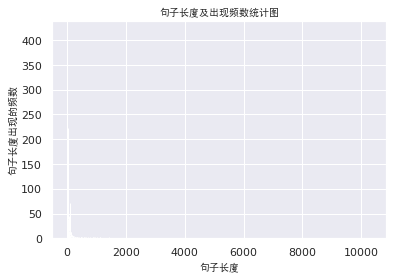


分位点为0.9的句子长度：108


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


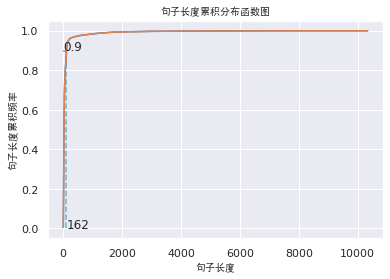

In [ ]:
#  设置matplotlib绘图时的字体
my_font = zhfont
 
#  统计句子长度及出现次数的频数
#df = pd.read_csv('./data_single.csv')
#print(df.groupby('label')['label'].count())
 
df['length'] = df['evaluation'].apply(lambda x: len(x))
# print(df)
len_df = df.groupby('length').count()
sent_length = len_df.index.tolist()
sent_freq = len_df['evaluation'].tolist()
 
#  绘制句子长度及出现频数统计图
plt.bar(sent_length, sent_freq)
plt.title("句子长度及出现频数统计图", fontproperties=my_font)
plt.xlabel("句子长度", fontproperties=my_font)
plt.ylabel("句子长度出现的频数", fontproperties=my_font)
plt.savefig("./句子长度及出现频数统计图.png")
plt.show()
plt.close()
 
#  绘制句子长度累计分布函数（CDF）
sent_pentage_list = [(count / sum(sent_freq)) for count in accumulate(sent_freq)]
 
# 绘制CDF
plt.plot(sent_length, sent_pentage_list)
 
#  寻找分位点为quantile的句子长度
quantile = 0.90
# print(list(sent_pentage_list))
for length, per in zip(sent_length, sent_pentage_list):
    if round(per, 2) == quantile:
        index = length
        break
print('\n分位点为%s的句子长度：%d' % (quantile, index))
 
# 绘制句子长度累积分布函数图
sns.set()
sns.lineplot(sent_length, sent_pentage_list)
plt.hlines(quantile, 0, index, colors="c", linestyles="dashed")
plt.vlines(index, 0, quantile, colors="c", linestyles="dashed")
plt.text(0, quantile, str(quantile))
plt.text(index, 0, 162)
plt.title("句子长度累积分布函数图", fontproperties=my_font)
plt.xlabel("句子长度", fontproperties=my_font)
plt.ylabel("句子长度累积频率", fontproperties=my_font)
plt.savefig("./句子长度累积分布函数图.png")
plt.show()

In [ ]:
df["sentiment"] = df['评论内容'].apply(lambda x: get_sentiment_cn(str(x)))
df

In [ ]:
!git clone https://github.com/renjunxiang/Text-Classification/

Cloning into 'Text-Classification'...
remote: Enumerating objects: 202, done.
remote: Total 202 (delta 0), reused 0 (delta 0), pack-reused 202
Receiving objects: 100% (202/202), 10.66 MiB | 16.62 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [ ]:
import pickle
import numpy as np
import pandas as pd
from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dense, Embedding, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
 
# 导入数据
# 文件的数据中，特征为evaluation, 类别为label.
def load_data(filepath, input_shape=20):
    df = pd.read_csv(filepath)
 
    # 标签及词汇表
    labels, vocabulary = list(df['label'].unique()), list(df['evaluation'].unique())
    # print(len(labels))
    # print(len(vocabulary))
 
    # 构造字符级别的特征
    string = ''
    for word in vocabulary:
        string += word
    # print(string)
 
    vocabulary = set(string)
    # print(vocabulary)
 
    # 字典列表
    word_dictionary = {word: i + 1 for i, word in enumerate(vocabulary)}
    with open('word_dict.pk', 'wb') as f:
        pickle.dump(word_dictionary, f)
    inverse_word_dictionary = {i + 1: word for i, word in enumerate(vocabulary)}
    label_dictionary = {label: i for i, label in enumerate(labels)}
    with open('label_dict.pk', 'wb') as f:
        pickle.dump(label_dictionary, f)
    output_dictionary = {i: labels for i, labels in enumerate(labels)}
 
    vocab_size = len(word_dictionary.keys())  # 词汇表大小
    label_size = len(label_dictionary.keys())  # 标签类别数量
    print(vocab_size, labels)
 
    # 序列填充，按input_shape填充，长度不足的按0补充
    x = [[word_dictionary[word] for word in sent] for sent in df['evaluation']]
    x = pad_sequences(maxlen=input_shape, sequences=x, padding='post', value=0)
    y = [[label_dictionary[sent]] for sent in df['label']]
    y = [np_utils.to_categorical(label, num_classes=label_size) for label in y]
    y = np.array([list(_[0]) for _ in y])
 
    return x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary
 
 
# 创建深度学习模型， Embedding + LSTM + Softmax.
def create_LSTM(n_units, input_shape, output_dim, filepath):
    x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary = load_data(filepath)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size + 1, output_dim=output_dim,
                        input_length=input_shape, mask_zero=True))
    model.add(LSTM(n_units, input_shape=(x.shape[0], x.shape[1])))
    model.add(Dropout(0.2))
    model.add(Dense(label_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
    plot_model(model, to_file='./model_lstm.png', show_shapes=True)
    model.summary()
 
    return model
 
 
# 模型训练
def model_train(input_shape, filepath, model_save_path):
    # 将数据集分为训练集和测试集，占比为9:1
    # input_shape = 100
    x, y, output_dictionary, vocab_size, label_size, inverse_word_dictionary = load_data(filepath, input_shape)
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)
 
    # 模型输入参数，需要自己根据需要调整
    n_units = 100
    batch_size = 32
    epochs = 10
    output_dim = 20
 
    # 模型训练
    lstm_model = create_LSTM(n_units, input_shape, output_dim, filepath)
    lstm_model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=1)
 
    # 模型保存
    lstm_model.save(model_save_path)
 
    N = test_x.shape[0]  # 测试的条数
    predict = []
    label = []
    # for start, end in zip(range(0, N, 1), range(1, N + 1, 1)):
    #     sentence = [inverse_word_dictionary[i] for i in test_x[start] if i != 0]
    #     y_predict = lstm_model.predict(test_x[start:end])
    #     label_predict = output_dictionary[np.argmax(y_predict[0])]
    #     label_true = output_dictionary[np.argmax(test_y[start:end])]
    #     print(''.join(sentence), label_true, label_predict)  # 输出预测结果
    #     predict.append(label_predict)
    #     label.append(label_true)
 
    acc = accuracy_score(predict, label)  # 预测准确率
    print('模型在测试集上的准确率为: %s.' % acc)

 
if __name__ == '__main__':
    filepath = './data_single.csv'
    input_shape = 180
    load_data(filepath, input_shape)
    model_save_path = './corpus_model.h5'
    model_train(input_shape, filepath, model_save_path)

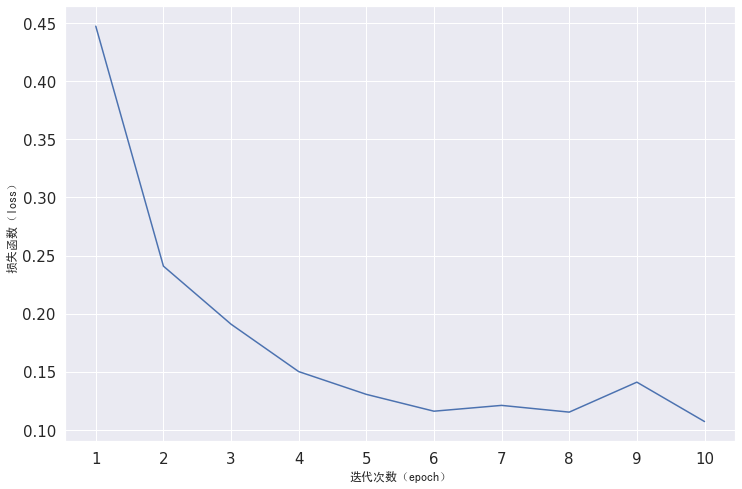

In [ ]:
losses = [0.4475,0.2409,0.1909,0.1501,0.1305,0.1160,0.1210,0.1152,0.1410,0.1071]
accs = [0.8075,0.9219,0.9434,0.9543,0.9608,0.9647,0.9696,0.9650,0.9590,0.9699]
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font=zhfont.get_name())
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况，需要u'内容'
sns.set()
plt.figure(figsize=(12, 8))
plt.plot(range(1,11,1),losses)
plt.xticks(range(1,11,1),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('迭代次数（epoch）', fontsize=20,fontproperties=zhfont)
plt.ylabel('损失函数（loss）', fontsize=20,fontproperties=zhfont)
plt.show()

In [ ]:
# Import the necessary modules
import pickle
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

# 导入字典
with open('word_dict.pk', 'rb') as f:
  word_dictionary = pickle.load(f)
with open('label_dict.pk', 'rb') as f:
  output_dictionary = pickle.load(f)

for text in textList:
  try:
    # 数据预处理
    input_shape = 180
    sent = text
    print(sent)
    x = [[word_dictionary[word] for word in sent]]
    print(x)
    x = pad_sequences(maxlen=input_shape, sequences=x, padding='post', value=0)

    # 载入模型
    model_save_path = './corpus_model.h5'
    lstm_model = load_model(model_save_path)

    # 模型预测
    y_predict = lstm_model.predict(x)
    label_dict = {v: k for k, v in output_dictionary.items()}
    print('输入语句: %s' % sent)
    print('情感预测结果: %s' % label_dict[np.argmax(y_predict)])
  
  except KeyError as err:
    print("您输入的句子有汉字不在词汇表中，请重新输入！")
    print("不在词汇表中的单词为：%s." % err)